In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("HistoricalPrices.csv")

# Rename the column to remove an additional space
df = df.rename(columns = {' Open':'Open', ' High':'High', ' Low':'Low', ' Close':'Close'})

# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the dataset in the ascending order of date
df = df.sort_values(by = 'Date')
df.head()

C:\Users\mondals\AppData\Local\Temp\ipykernel_18228\3528224333.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close
752,2022-01-03,36321.59,36595.82,36246.45,36585.06
751,2022-01-04,36636.00,36934.84,36636.00,36799.65
750,2022-01-05,36722.60,36952.65,36400.39,36407.11
749,2022-01-06,36409.05,36464.19,36200.68,36236.47
748,2022-01-07,36249.59,36382.84,36111.53,36231.66


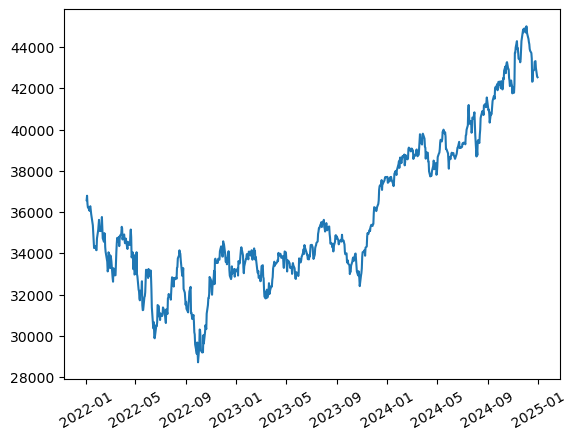

In [3]:
# Extract the date and close price columns
dates = df['Date']
closing_price = df['Close']

# Create a line plot
plt.plot(dates, closing_price)
plt.xticks(rotation=30)

# show the plot
plt.show()

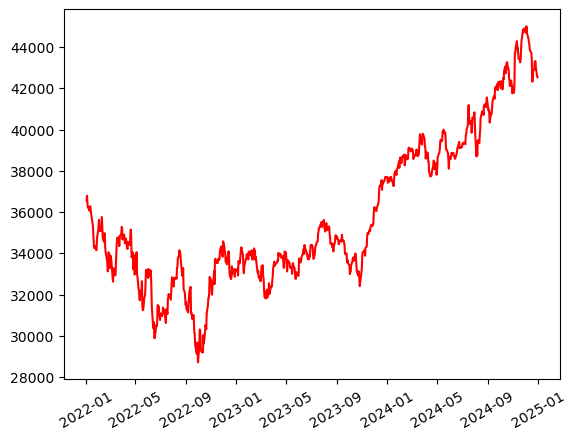

In [4]:
# Plot in Red colour
plt.plot(dates, closing_price, color='red')
plt.xticks(rotation=30)

# show the plot
plt.show()

[]

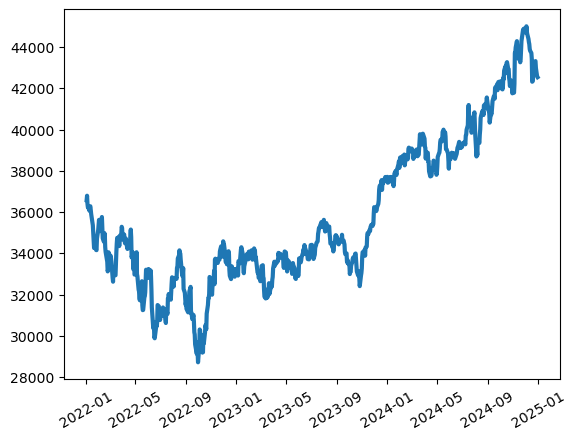

In [5]:
# Increasing the linewidth
plt.plot(dates, closing_price, linewidth=3)
plt.xticks(rotation=30)

# show the plot
plt.plot()

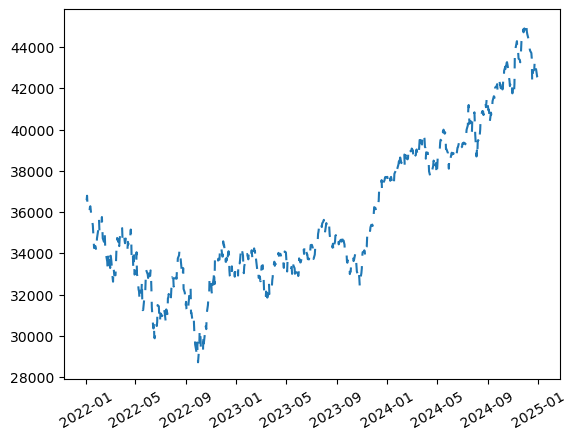

In [6]:
# Individually plot lines in solid, dotted, dashed and dashdot
# Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

#plt.plot(dates, closing_price, linestyle='solid') # Default line style
#plt.plot(dates, closing_price, linestyle='dotted')
#plt.plot(dates, closing_price, linestyle='dashed')
#plt.plot(dates, closing_price, linestyle='dashdot')
#plt.plot(dates, closing_price, linestyle=(0, (1, 10)))
plt.plot(dates, closing_price, linestyle=(0, (5, 5)))
plt.xticks(rotation=30)

# Show the plot
plt.show()

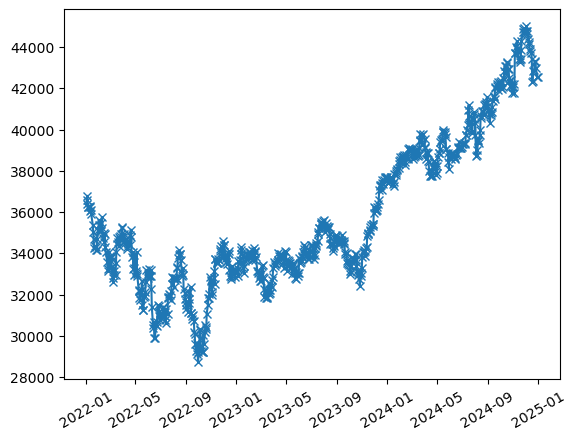

In [7]:
# Add a cross marker for each point
# Reference: https://matplotlib.org/stable/api/markers_api.html

plt.plot(dates, closing_price, marker='x')
plt.xticks(rotation=30)

# Show the plot
plt.show()

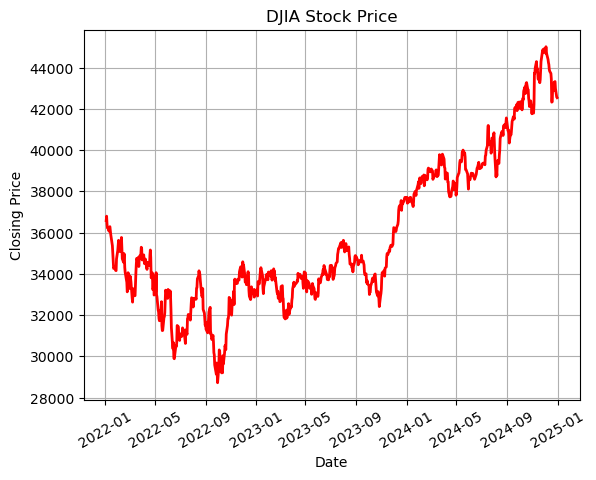

In [8]:
# Adding grid lines
plt.plot(dates, closing_price, color='red', linewidth=2)
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('DJIA Stock Price')

# add the grid
plt.grid(True)

# show the plot
plt.show()

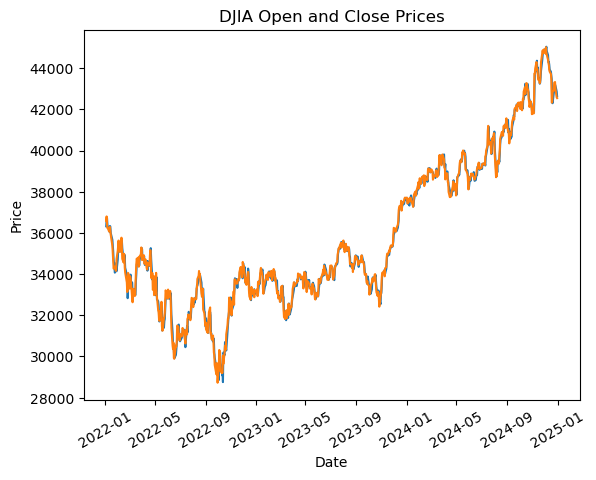

In [9]:
# Matplotlib Line Plots with Multiple Lines
plt.plot(df['Date'], df['Open'])
plt.plot(df['Date'], df['Close'])
plt.xticks(rotation=30)

plt.title('DJIA Open and Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()

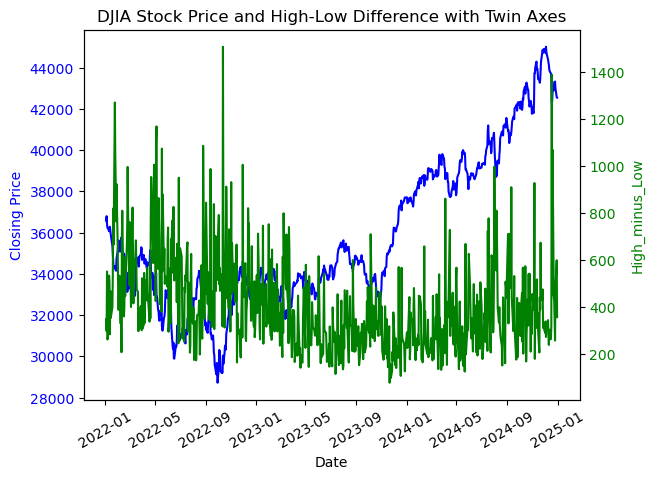

In [10]:
# Matplotlib Line Plots with Twin Axes
# Create a new variable for demonstration purposes
df['High_minus_Low'] = df['High'] - df['Low']

# Create a basic line plot for the Close prices
fig, ax1 = plt.subplots()
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelrotation=30)
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a twin axis for the High_minus_Low variable
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['High_minus_Low'], color='green', label='High - Low')
ax2.set_ylabel('High_minus_Low', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and show the plot
plt.title('DJIA Stock Price and High-Low Difference with Twin Axes')
plt.show()

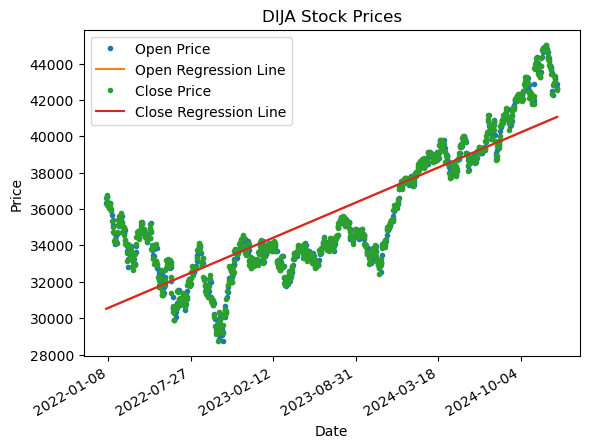

In [11]:
# Adding a Matplotlib regression line
import matplotlib.dates as mdates

# Convert Date column to numeric value
df['Date'] = mdates.date2num(df['Date'])

# Add regression line to plot
coefficients_open = np.polyfit(df['Date'], df['Open'], 1)
p_open = np.poly1d(coefficients_open)

coefficients_close = np.polyfit(df['Date'], df['Close'], 1)
p_close = np.poly1d(coefficients_close)

fig, ax = plt.subplots()
ax.plot(df['Date'], df['Open'], '.', label='Open Price')
ax.plot(df['Date'], p_open(df['Date']), '-', label='Open Regression Line')
ax.plot(df['Date'], df['Close'], '.', label='Close Price')
ax.plot(df['Date'], p_close(df['Date']), '-', label='Close Regression Line')
ax.set_title('DIJA Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

# Create a DateFormatter object
# You can change the format string (e.g., '%b %d' for "Jan 01")
date_format = mdates.DateFormatter('%Y-%m-%d')

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(date_format)

# Optional: Auto-rotate the date labels for better readability
fig.autofmt_xdate()

plt.show()

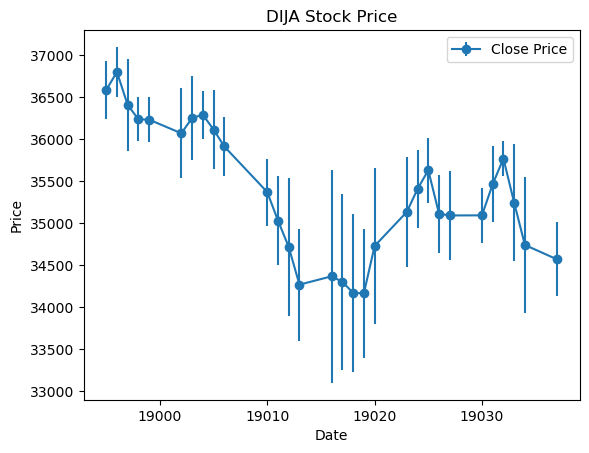

In [12]:
# Adding error bars
# Calculate standard deviation of data
std = df['Close'].std()

# Add error bars to plot
#plt.errorbar(df['Date'], df['Close'], yerr=std/2, fmt='.', label='Close Price')
#plt.errorbar(df['Date'], df['Close'], yerr=df['High_minus_Low'], fmt='.', label='Close Price')
plt.errorbar(df['Date'][:30], df['Close'][:30], yerr=df['High_minus_Low'][:30], fmt='-o', label='Close Price')

plt.title('DIJA Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

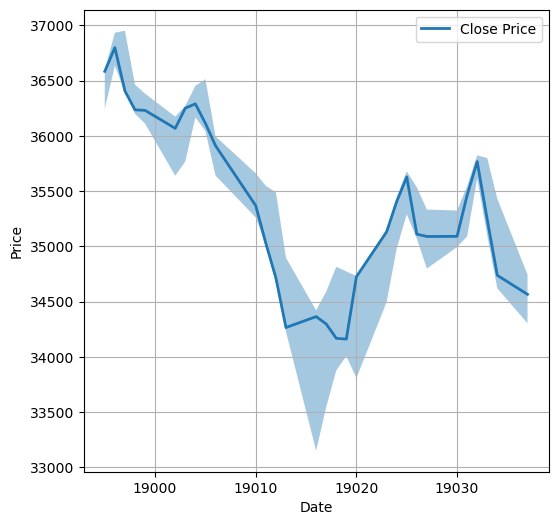

In [22]:
# fill_between with transparency
fig, ax = plt.subplots(1,figsize=(6,6))
ax.plot(df['Date'][:30], df['Close'][:30], linewidth=2, label='Close Price')
#ax.fill_between(df['Date'][:30], df['Close'][:30]+df['High_minus_Low'][:30]/2, df['Close'][:30]-df['High_minus_Low'][:30]/2, facecolor='C0', alpha=0.4)
ax.fill_between(df['Date'][:30], df['High'][:30], df['Low'][:30], facecolor='C0', alpha=0.4)
ax.legend(loc='upper right')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.grid()

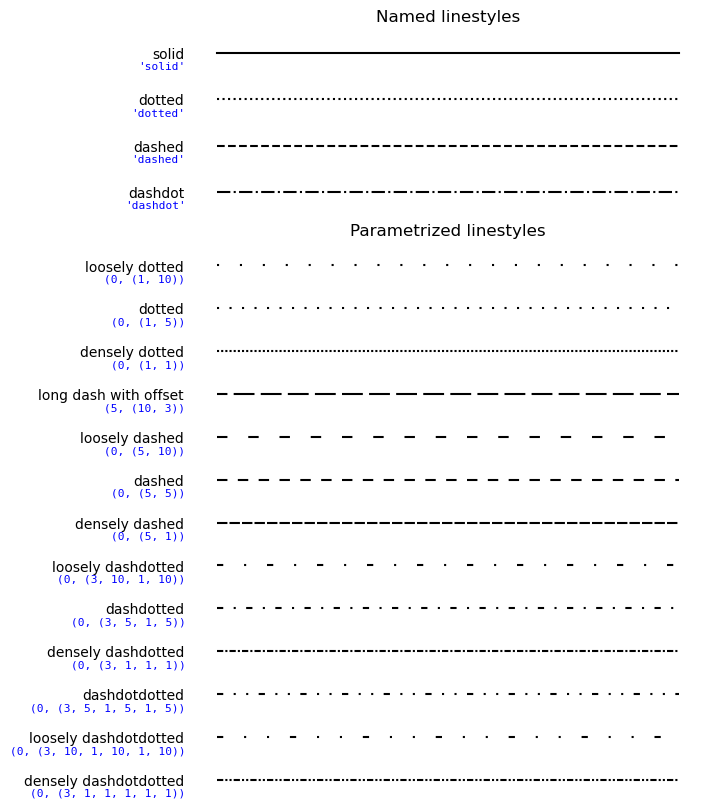

In [13]:
# Linestyles
linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),

     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


def plot_linestyles(ax, linestyles, title):
    X, Y = np.linspace(0, 100, 10), np.zeros(10)
    yticklabels = []

    for i, (name, linestyle) in enumerate(linestyles):
        ax.plot(X, Y+i, linestyle=linestyle, linewidth=1.5, color='black')
        yticklabels.append(name)

    ax.set_title(title)
    ax.set(ylim=(-0.5, len(linestyles)-0.5),
           yticks=np.arange(len(linestyles)),
           yticklabels=yticklabels)
    ax.tick_params(left=False, bottom=False, labelbottom=False)
    ax.spines[:].set_visible(False)

    # For each line style, add a text annotation with a small offset from
    # the reference point (0 in Axes coords, y tick value in Data coords).
    for i, (name, linestyle) in enumerate(linestyles):
        ax.annotate(repr(linestyle),
                    xy=(0.0, i), xycoords=ax.get_yaxis_transform(),
                    xytext=(-6, -12), textcoords='offset points',
                    color="blue", fontsize=8, ha="right", family="monospace")


fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(7, 8), height_ratios=[1, 3],
                               layout='constrained')

plot_linestyles(ax0, linestyle_str[::-1], title='Named linestyles')
plot_linestyles(ax1, linestyle_tuple[::-1], title='Parametrized linestyles')

plt.show()

In [14]:
from matplotlib.lines import Line2D
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D

text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontfamily='monospace')
marker_style = dict(linestyle=':', color='0.8', markersize=10,
                    markerfacecolor="tab:blue", markeredgecolor="tab:blue")


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


def split_list(a_list):
    i_half = len(a_list) // 2
    return a_list[:i_half], a_list[i_half:]

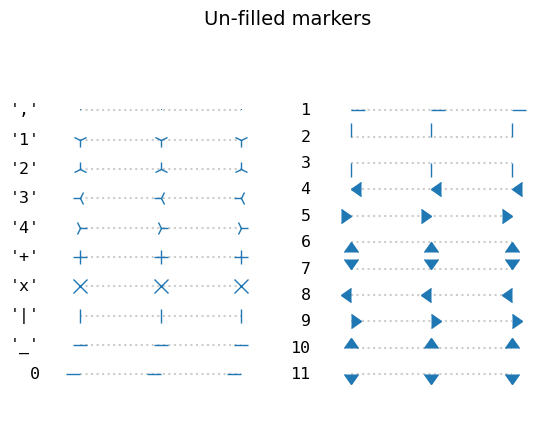

In [15]:
# Unfilled markers
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Un-filled markers', fontsize=14)

# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]

for ax, markers in zip(axs, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

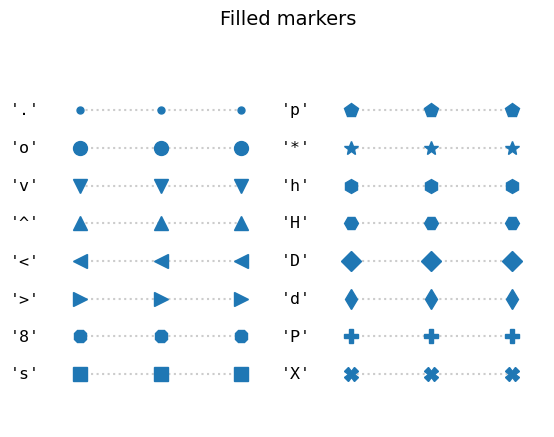

In [16]:
# Filled markers
fig, axs = plt.subplots(ncols=2)
fig.suptitle('Filled markers', fontsize=14)
for ax, markers in zip(axs, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, repr(marker), **text_style)
        ax.plot([y] * 3, marker=marker, **marker_style)
    format_axes(ax)

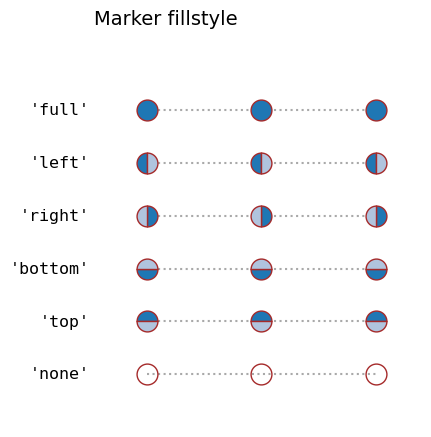

In [17]:
# Marker fill styles
fig, ax = plt.subplots()
fig.suptitle('Marker fillstyle', fontsize=14)
fig.subplots_adjust(left=0.4)

filled_marker_style = dict(marker='o', linestyle=':', markersize=15,
                           color='darkgrey',
                           markerfacecolor='tab:blue',
                           markerfacecoloralt='lightsteelblue',
                           markeredgecolor='brown')

for y, fill_style in enumerate(Line2D.fillStyles):
    ax.text(-0.5, y, repr(fill_style), **text_style)
    ax.plot([y] * 3, fillstyle=fill_style, **filled_marker_style)
format_axes(ax)

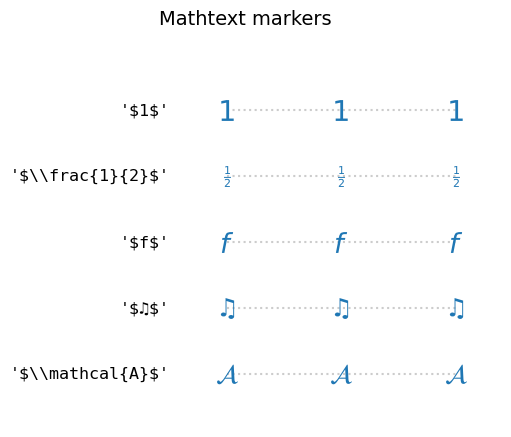

In [18]:
# Markers created from TeX symbols
fig, ax = plt.subplots()
fig.suptitle('Mathtext markers', fontsize=14)
fig.subplots_adjust(left=0.4)

marker_style.update(markeredgecolor="none", markersize=15)
markers = ["$1$", r"$\frac{1}{2}$", "$f$", "$\u266B$", r"$\mathcal{A}$"]

for y, marker in enumerate(markers):
    # Escape dollars so that the text is written "as is", not as mathtext.
    ax.text(-0.5, y, repr(marker).replace("$", r"\$"), **text_style)
    ax.plot([y] * 3, marker=marker, **marker_style)
format_axes(ax)

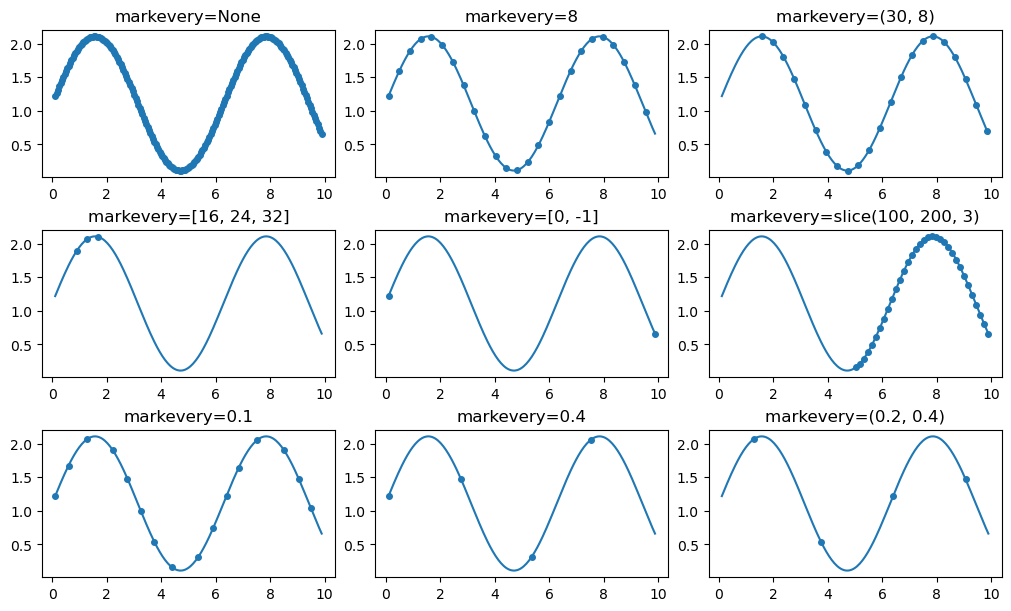

In [19]:
# Markevery Demo
# define a list of markevery cases to plot
cases = [
    None,
    8,
    (30, 8),
    [16, 24, 32],
    [0, -1],
    slice(100, 200, 3),
    0.1,
    0.4,
    (0.2, 0.4)
]

# data points
delta = 0.11
x = np.linspace(0, 10 - 2 * delta, 200) + delta
y = np.sin(x) + 1.0 + delta

fig, axs = plt.subplots(3, 3, figsize=(10, 6), layout='constrained')
for ax, markevery in zip(axs.flat, cases):
    ax.set_title(f'markevery={markevery}')
    ax.plot(x, y, 'o', ls='-', ms=4, markevery=markevery)